In [2]:
import subprocess
import shlex

In [3]:
import csb

In [4]:
uniclust = '/home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08'


In [5]:
def runHHblits( aln , name, path , outdir, db , iterations , ncores , runName='' , SS= False  , ohhm = False , verbose = True , Z = 2000 , B = 2000 , xargs = ''):
    if verbose == True:
        print( [aln , name, path , outdir, db , iterations , ncores , runName] )
    
    outhhr= outdir+name+runName+".hhr"
    args = path + ' -cpu '+ str(ncores) +' -d ' + db + ' -i ' + aln  +' -o '+ outhhr + ' -n ' + str(iterations) + ' -B '+ str(B) + ' -Z ' + str(Z) +' '+ xargs 
    if SS == True:
         args += ' -ssm 2 -ssw .5 '
    
    if ohhm == True:
        outa3m = outdir+name+runName+'.hhm'
        args += ' -ohhm ' + outa3m
    else: 
        outa3m = None
    if verbose == True:
        print(args)
    
    args = shlex.split( args)
    p = subprocess.run( args )
    return p , [outhhr,outa3m]


def runHHmake( aln , name, path = 'hhmake' , outdir='./', verbose = False, SS = False):
    if verbose == True:
        print( [aln , name, path , outdir] )
    outhhm= outdir+name+".hhm"
    args = path + ' -i '+  aln  +' -o '+ outhhm + ' -M 50'
    if SS == True:
        #todo : make ss prediction here
        pass
    args = shlex.split(args)
    print(args)
    p = subprocess.Popen(args )
    return p , [outhhm]

    

def hhrparse(hhr , coverage , proba ):
    profile = HHOutputParser(alignments=False).parse_file(hhr)
    qname = profile.query_name
    for hit in profile:
        proba = hit.probability
        i = hit.id

def query2PFAM_PDB(qaln, name , outdir= './' , path = 'hhblits' , verbose = False):
    uniclust = '/home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08'
    pdb70 = '/home/cactuskid13/mntpt/HHBLITsdb/pdb70/pdb70'
    pfam = '/home/cactuskid13/mntpt/HHBLITsdb/pfam'
    
    db = uniclust
    iterations = 2
    ncores = 4
    
    runName = 'UNI'
    SS  = False
    oa3m = True
    
    p, ret = runHHblits( qaln ,name, path , outdir, db , iterations , ncores , runName , SS  , oa3m , verbose)
    p.wait()
    UNI_HHR = ret[0]
    '''
    #todo_add SS to model here
    
    db = pfam
    iterations = 1
    ncores = 1
    runName = 'PFAM'
    SS  = False
    oa3m = False
    qaln = ret[1]
    
    p, ret = runHHblits( qaln , name,  path , outdir, db , iterations , ncores , runName , SS  , oa3m , verbose)
    p.wait()
    PFAM_HHR = ret[1]
    
    
    db = pdb70
    iterations = 1
    ncores = 1
    runName = 'PDB'
    SS  = False
    oa3m = False
    
    p, ret = runHHblits( qaln ,name , path , outdir, db , iterations , ncores , runName , SS  , oa3m , verbose  )
    p.wait()
    PDB_HHR = ret[1]
    '''
    return UNI_HHR #, PDB_HHR , PFAM_HHR

def PFAM_HHR2GO(hhr):
    #map thru interpro
    
    pass

def PDB_HHR2GO(hhr):
    #map from pdb
    
    pass

def UNI_HHR2GO(hhr):
    #map from uniprot gaf
    
    #map to uniclust cluster rep and grab all identifiers
    
    #check if there are any annotations in cluster
    
    
    pass

In [6]:
import hhsuitedb as hhdb

In [7]:
#generate profiles for each type of fusexin
#these are hand selected known fusexins
import glob
from Bio import SeqIO
import os

qdir = 'orco/'
runName ='ORCO'
ncores = 50

In [8]:
queries = glob.glob(qdir + '*.fasta')
if not os.path.exists(qdir +'queries'):
    os.mkdir(qdir + 'queries')
if not os.path.exists(qdir +'HHfiles'):
    os.mkdir(qdir + 'HHfiles')
if not os.path.exists(qdir +'ALLVSALL'):
    os.mkdir(qdir + 'ALLVSALL')

for qfile in queries:
    fasta = SeqIO.parse(qfile, 'fasta')
    for s in fasta:
        SeqIO.write( [s]  ,  qdir + 'queries/' + s.id + '.fasta' , 'fasta' )

In [9]:
queries = glob.glob(qdir + 'queries/*fasta')


In [10]:
print(queries)

for q in queries:
    p,output = runHHblits(q , name = q.split('.')[0].split('/')[-1] + 'Profphylo' , path= 'hhblits ' , outdir = qdir+'HHfiles/' , db = uniclust , iterations= 3 , ncores = ncores , ohhm = True, verbose = True , runName=runName, xargs = ' -mact .5')    

['orco/queries/AthaAT1G67570.fasta', 'orco/queries/DmelGr64a.fasta', 'orco/queries/MpusGRL1.fasta', 'orco/queries/VbraGRL5.fasta', 'orco/queries/TtraGRL4.fasta', 'orco/queries/TtraGRL6.fasta', 'orco/queries/SkowGRL1.fasta', 'orco/queries/TadhGRL1.fasta', 'orco/queries/AthaAT2G21080.fasta', 'orco/queries/VbraGRL4.fasta', 'orco/queries/AbakORCO.fasta', 'orco/queries/NvecGRL1.fasta', 'orco/queries/TtraGRL5.fasta', 'orco/queries/VbraGRL6.fasta', 'orco/queries/SpurGRL1.fasta', 'orco/queries/AthaAT4G03820.fasta', 'orco/queries/CpriGRL1.fasta', 'orco/queries/VbraGRL1.fasta', 'orco/queries/PfunGRL1.fasta', 'orco/queries/TtraGRL2.fasta', 'orco/queries/AthaAT1G50630.fasta', 'orco/queries/TtraGRL1.fasta', 'orco/queries/TtraGRL3.fasta', 'orco/queries/VbraGRL2.fasta', 'orco/queries/SpalGRL1.fasta', 'orco/queries/VbraGRL3.fasta']
['orco/queries/AthaAT1G67570.fasta', 'AthaAT1G67570Profphylo', 'hhblits ', 'orco/HHfiles/', '/home/cactuskid13/mntpt/HHBLITsdb/uniclust30_2018_08/uniclust30_2018_08', 3, 50

KeyboardInterrupt: 

In [22]:
#make a db with HMMS

if os.path.exists(qdir+runName+'profilephylo_v2_hhm_db'):
    os.rm(qdir+runName+'profilephylo_v2_hhm_db*')

import hhsuitedb
hhsuitedb.add_new_files(  qdir+'HHfiles/*.hhm' , "hhm" ,  qdir+runName+'profilephylo_v2_hhm_db')


In [54]:
#run all v all comparison
hhms = glob.glob(  qdir+'HHfiles/*.hhm' )
print(hhms)
for q in hhms:
    p,output = runHHblits(q , name = q.split('.')[0].split('/')[-1] + 'allvall' , path= 'hhsearch ' , outdir = qdir+'ALLVSALL/' , db = qdir+runName+'profilephylo_v2_hhm_db' , iterations= 1 , ncores = ncores , ohhm = False, verbose = True , runName= 'test' , xargs = ' -mact .3')

['orco/HHfiles/VbraGRL1ProfphyloORCO.hhm', 'orco/HHfiles/NvecGRL1ProfphyloORCO.hhm', 'orco/HHfiles/AbakORCOProfphyloORCO.hhm', 'orco/HHfiles/VbraGRL2ProfphyloORCO.hhm', 'orco/HHfiles/AthaAT1G67570ProfphyloORCO.hhm', 'orco/HHfiles/TtraGRL1ProfphyloORCO.hhm', 'orco/HHfiles/CpriGRL1ProfphyloORCO.hhm', 'orco/HHfiles/TtraGRL6ProfphyloORCO.hhm', 'orco/HHfiles/AthaAT1G50630ProfphyloORCO.hhm', 'orco/HHfiles/TtraGRL2ProfphyloORCO.hhm', 'orco/HHfiles/TtraGRL5ProfphyloORCO.hhm', 'orco/HHfiles/VbraGRL5ProfphyloORCO.hhm', 'orco/HHfiles/MpusGRL1ProfphyloORCO.hhm', 'orco/HHfiles/AthaAT2G21080ProfphyloORCO.hhm', 'orco/HHfiles/VbraGRL3ProfphyloORCO.hhm', 'orco/HHfiles/AthaAT4G03820ProfphyloORCO.hhm', 'orco/HHfiles/VbraGRL6ProfphyloORCO.hhm', 'orco/HHfiles/SpurGRL1ProfphyloORCO.hhm', 'orco/HHfiles/SpalGRL1ProfphyloORCO.hhm', 'orco/HHfiles/VbraGRL4ProfphyloORCO.hhm', 'orco/HHfiles/TadhGRL1ProfphyloORCO.hhm', 'orco/HHfiles/DmelGr64aProfphyloORCO.hhm', 'orco/HHfiles/TtraGRL3ProfphyloORCO.hhm', 'orco/HHfile

In [57]:
#parse hhr files and make dist kernel
#use Fastme to make a tree
import numpy as np
import networkx as nx
import os
import glob
from csb.bio.io.hhpred import HHOutputParser
import subprocess , shlex
import pickle
import tempfile
from ete3 import PhyloTree
import seaborn as sns

def runFastme( fastmepath , clusterfile ):
    args =  fastmepath +  ' -i ' + clusterfile + ' -o ' + clusterfile+'_tree.txt'
    print( args)
    p = subprocess.call(shlex.split(args) , stdout=subprocess.PIPE )
    return p,[clusterfile+'_tree.txt' ]

def distmat_to_txt( namelist , distmat, filedir , name):
    print( namelist)
    print( distmat.shape)
    outstr = str(len(namelist)) + '\n'
    for i,pdb in enumerate(namelist):
        namestr = pdb[0:20]
        outstr += namestr+ ' ' + np.array2string( distmat[i,:], formatter={'float_kind':lambda x: "%.2f" % x} , precision = 8 ).replace('[', '').replace(']', '').replace('\n', '' )  + '\n'
    with open(filedir + name + 'fastmemat.txt' , 'w') as handle:
        handle.write(outstr)
    return filedir + name + 'fastmemat.txt' 

def cleanID(ID):
    
    if '|PDBID' in ID:
        ID = ID.split('|PDBID')[0]
    
    elif '|' in ID:
        ID = ID.split('|')[0].split()[0]
    elif '.' in ID:
        ID = ID.split('.')[0]
    elif '/' in ID:
        ID = ID.split('/')[0]
    elif 'hmmercut' in ID:
        ID = ID.split('hmmercut')[0]
    ID = ID.split()[0]
    ID = ID.strip()
    return ID


def HHSearch_parseTo_DMandNX(hhrs ):
    clusternames = []
        
    for i,hhr in enumerate(hhrs):
        print(hhr)
        profile = HHOutputParser(alignments=False).parse_file(hhr)
        if cleanID(profile.query_name) not in clusternames:
            print(cleanID(profile.query_name))
            clusternames.append(cleanID(profile.query_name))
         
    print(clusternames)
    evalDM = np.ones( (len(clusternames),len(clusternames) ))
    pvalDM = np.ones( (len(clusternames),len(clusternames) ))
    scoreDM = np.zeros( (len(clusternames),len(clusternames) ))
    SSDM = np.zeros( (len(clusternames),len(clusternames) ))
    probaDM = np.zeros( (len(clusternames),len(clusternames) ))
    lenDM =  np.ones( (len(clusternames),len(clusternames) ))
    
    NX = nx.Graph()
    
    for i,hhr in enumerate(hhrs):
        protlist = []
        profile = HHOutputParser(alignments=False).parse_file(hhr)
        for hit in profile:
            DMscore = float(hit.evalue)
            proba = hit.probability
            if 'anchor' not in hit.id and 'anchor' not in profile.query_name:
                i = clusternames.index(cleanID(hit.id))
                j = clusternames.index(cleanID(profile.query_name))

                if hit.evalue < evalDM[i,j]:
                    evalDM[i,j] = hit.evalue
                    evalDM[j,i] = evalDM[i,j]

                if hit.pvalue < pvalDM[i,j]:
                    pvalDM[i,j] = hit.pvalue
                    pvalDM[j,i] = pvalDM[i,j]

                if scoreDM[i,j] < hit.score:
                    scoreDM[i,j] = hit.score
                    scoreDM[j,i] = scoreDM[i,j]

                if SSDM[i,j] < hit.ss_score:
                    SSDM[i,j] = hit.ss_score
                    SSDM[j,i] = SSDM[i,j]


                if probaDM[i,j] < hit.probability:
                    probaDM[i,j] = hit.probability
                    probaDM[j,i] = probaDM[i,j]

                #use smallest of the two prots
                if lenDM[i,j] == 1 or lenDM[i,j] > hit.qlength:
                    lenDM[i,j] = hit.qlength
                    lenDM[j,i] = lenDM[i,j]

            if hit.id != profile.query_name :
                NX.add_edge( hit.id , profile.query_name )
                NX[hit.id][profile.query_name]['score']= hit.score
    return probaDM, evalDM ,pvalDM,  lenDM , scoreDM, SSDM, NX , clusternames




['orco/ALLVSALL/AthaAT2G21080ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/AthaAT1G67570ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/VbraGRL5ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/PfunGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/NvecGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/DmelGr64aProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/TtraGRL5ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/MpusGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/SpalGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/VbraGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/SkowGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/TtraGRL3ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/SpurGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/AthaAT4G03820ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/TtraGRL6ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/TtraGRL1ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/AthaAT1G50630ProfphyloORCOallvalltest.hhr', 'orco/ALLVSALL/TadhGRL1ProfphyloORCOallvalltest.hhr', 'orco/

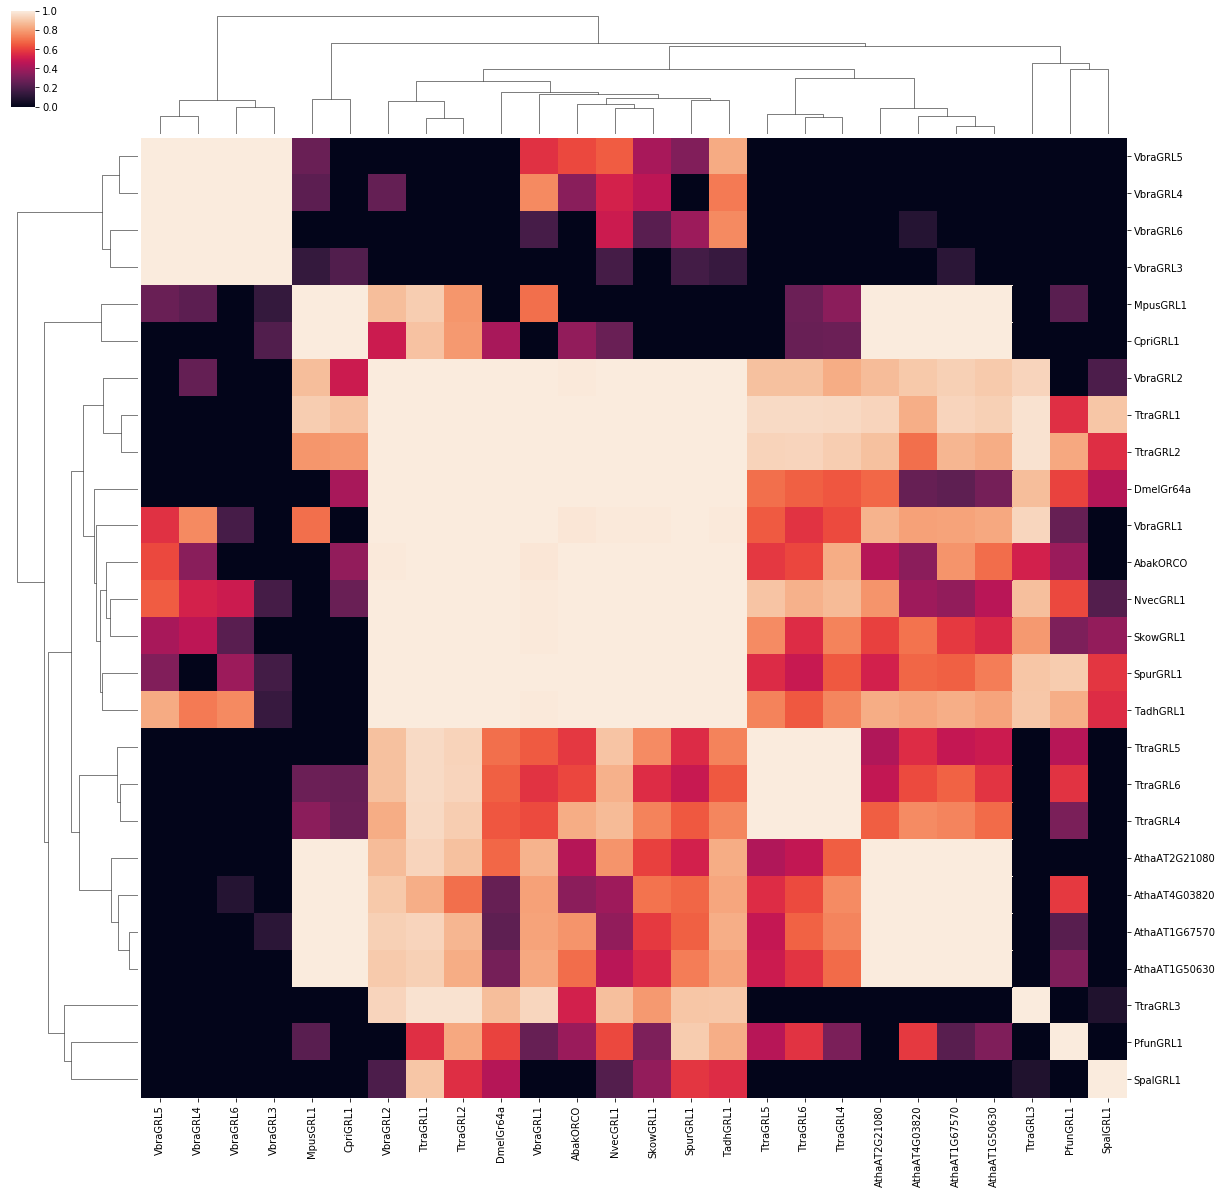

In [62]:
import seaborn as sns
print(glob.glob(qdir+'ALLVSALL/*.hhr'))
probaDM, evalDM ,pvalDM,  lenDM , scoreDM, SSDM, NX , clusternames = HHSearch_parseTo_DMandNX(glob.glob(qdir+ 'ALLVSALL/*.hhr'))

g = sns.clustermap( probaDM , xticklabels=clusternames  , yticklabels=clusternames , figsize = (20,20) )


#g = sns.clustermap( np.log(evalDM) , xticklabels=clusternames  , yticklabels=clusternames , figsize = (20,20) )



In [63]:
text = distmat_to_txt( namelist= clusternames , distmat= 1-probaDM , filedir = qdir , name = runName)
print(text)

['AthaAT2G21080', 'AthaAT1G67570', 'VbraGRL5', 'PfunGRL1', 'NvecGRL1', 'DmelGr64a', 'TtraGRL5', 'MpusGRL1', 'SpalGRL1', 'VbraGRL1', 'SkowGRL1', 'TtraGRL3', 'SpurGRL1', 'AthaAT4G03820', 'TtraGRL6', 'TtraGRL1', 'AthaAT1G50630', 'TadhGRL1', 'VbraGRL6', 'AbakORCO', 'TtraGRL4', 'VbraGRL4', 'VbraGRL3', 'CpriGRL1', 'TtraGRL2', 'VbraGRL2']
(26, 26)
orco/ORCOfastmemat.txt
